In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,98.090554,0,10,0,0,1
1,99.543885,0,58,1,0,0
2,99.831415,0,8,0,0,1
3,100.090138,0,89,0,1,0
4,101.119591,1,33,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 6 columns):
fever            3016 non-null float64
bodyPain         3016 non-null int64
age              3016 non-null int64
runnyNose        3016 non-null int64
diffBreath       3016 non-null int64
infectionProb    3016 non-null int64
dtypes: float64(1), int64(5)
memory usage: 141.4 KB


### Checking Any Missing Value exist or not?

In [5]:
df.isnull().sum()

fever            0
bodyPain         0
age              0
runnyNose        0
diffBreath       0
infectionProb    0
dtype: int64

### Describing the Dataset

In [6]:
df.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000
mean,100.002842,0.504973,50.609085,0.497016,-0.012599,0.499668
std,1.142058,0.500058,28.824833,0.500074,0.811101,0.500083
min,98.002796,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,99.024492,0.000000,26.000000,0.000000,-1.000000,0.000000
50%,100.009168,1.000000,51.000000,0.000000,0.000000,0.000000
75%,100.992547,1.000000,75.000000,1.000000,1.000000,1.000000
max,101.997953,1.000000,100.000000,1.000000,1.000000,1.000000


# Patient Having Difficulty in Breathing and have infection

In [7]:
patient = df[(df['diffBreath']==1) & (df['infectionProb']== 1)]

In [8]:
patient

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
15,98.705987,1,44,0,1,1
20,98.716031,1,38,1,1,1
27,99.620341,0,44,1,1,1
47,100.145911,0,44,0,1,1
53,99.371615,1,69,1,1,1
...,...,...,...,...,...,...
2978,99.359732,0,56,1,1,1
2984,99.277713,0,92,1,1,1
2986,98.774640,1,72,0,1,1
3000,98.693016,1,56,0,1,1


# Looking for Correlations

In [45]:
corr_matrix = df.corr()

In [46]:
corr_matrix['infectionProb'].sort_values(ascending=False)

infectionProb    1.000000
age              0.018364
fever            0.006009
bodyPain        -0.009278
diffBreath      -0.027812
runnyNose       -0.027856
Name: infectionProb, dtype: float64

## Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103DBB80>,
      dtype=object)

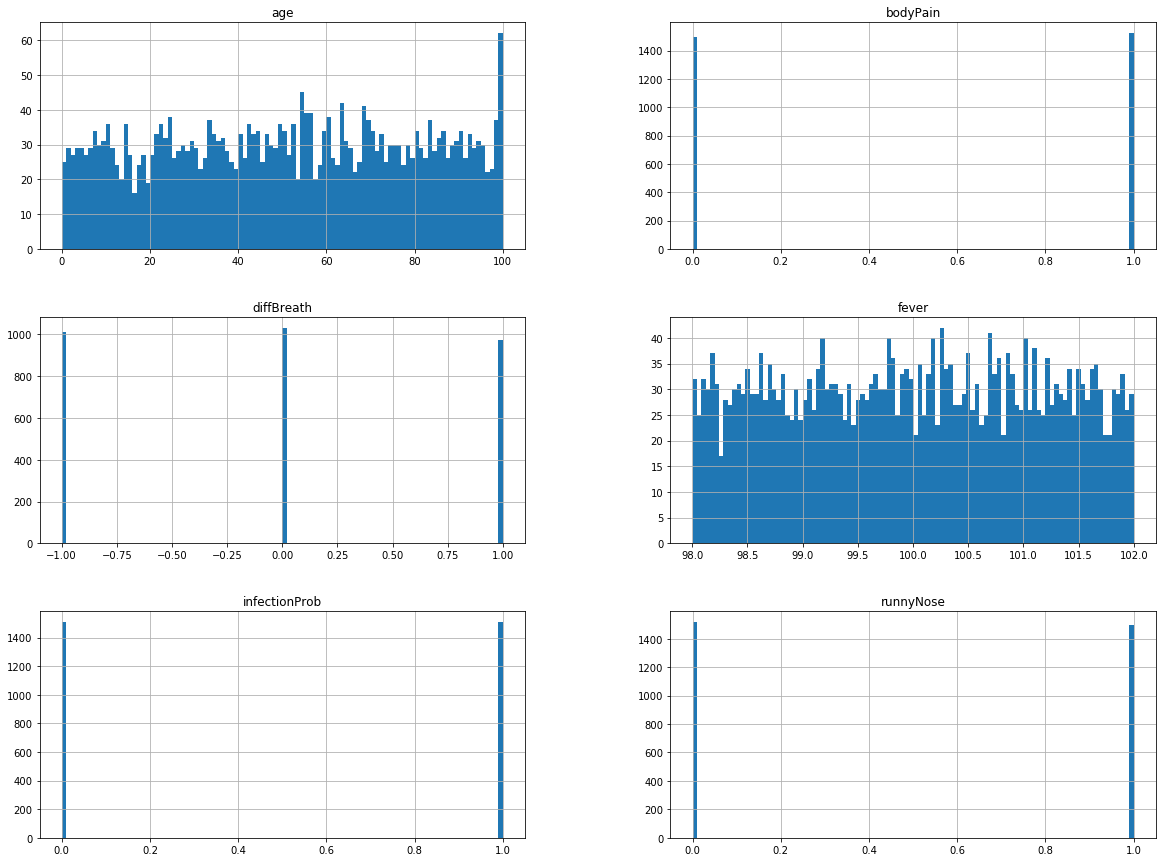

In [9]:
df.hist(bins=100, figsize=(20,15))

In [10]:
ag =df[(df['age']) & (df['infectionProb']== 1)]

In [11]:
ag.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.0
mean,99.966339,0.509859,50.281690,0.473239,-0.047887,1.0
std,1.119371,0.500255,28.287604,0.499635,0.817968,0.0
min,98.016546,0.000000,1.000000,0.000000,-1.000000,1.0
25%,99.000271,0.000000,27.000000,0.000000,-1.000000,1.0
50%,99.978812,1.000000,50.000000,0.000000,0.000000,1.0
75%,100.925691,1.000000,73.000000,1.000000,1.000000,1.0
max,101.997953,1.000000,99.000000,1.000000,1.000000,1.0


## Lets Prepare our Ml model

In [12]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,random_state = 42)

In [15]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2412, 5), (604, 5), (2412,), (604,))

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
pred =  model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [21]:
confusion_matrix(Y_test,pred)

# using confusion_matrix we can calculate accuracy
# (153+155)/(153+143+153+155)

array([[153, 153],
       [143, 155]], dtype=int64)

In [22]:
(153+155)/(153+143+153+155)

0.5099337748344371

In [23]:
accuracy_score(Y_test,pred)

0.5099337748344371

### Therefor accuracy using Logistic Regression is 50%

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier()

In [26]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
pred = model.predict(X_test)

In [28]:
accuracy_score(Y_test,pred)

0.5132450331125827

### Therefor accuracy using Decision Tree Classifier is 50.08%

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model = RandomForestClassifier()

In [31]:
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
pred = model.predict(X_test)

In [33]:
accuracy_score(Y_test,pred)

0.5298013245033113

### Therefor accuracy using Random Forest Classifier is 53.33%

In [34]:
from sklearn.svm import SVC

In [35]:
model = SVC()

In [36]:
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
pred = model.predict(X_test)

In [38]:
accuracy_score(Y_test,pred)

0.5132450331125827

### Therefor accuracy using Support Vector Classifier is 51.32%

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
model = GaussianNB()

In [41]:
model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
pred = model.predict(X_test)

In [43]:
accuracy_score(Y_test,pred)

0.5066225165562914

### Therefore accuracy using Naive Bayes Classifier is 50.66%

# Random Forest Classifier has Maximum Accuracy.